In [ ]:
# Taufik Kurahman Sasmita
# 1103200008
# TK44G4
# Neural_Network_Predicting-House-Price-Kaggle_GColabs
# Dokumentasi ChatGPT : https://chatgpt.com/c/d0fb619c-ea96-437a-a640-e00d72809cf6

In [ ]:
from google.colab import drive

# Menghubungkan ke Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Path ke dataset di Google Drive
file_path = '/content/drive/MyDrive/Dataset/housepricedata.csv'

# Membaca dataset sebagai DataFrame Pandas
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
df.head()


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


Pisahkan Fitur dan Targer

In [ ]:
X = df.drop('AboveMedianPrice', axis=1)
y = df['AboveMedianPrice']

Normalisasi Data

In [ ]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

Split Data

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


Bangun Model Neural Network

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

Latih Model

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 14ms/step - loss: 0.6896 - accuracy: 0.5137 - val_loss: 0.6848 - val_accuracy: 0.5845
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6812 - accuracy: 0.6468 - val_loss: 0.6770 - val_accuracy: 0.7032
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6750 - accuracy: 0.7016 - val_loss: 0.6710 - val_accuracy: 0.6895
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6701 - accuracy: 0.6673 - val_loss: 0.6659 - val_accuracy: 0.6621
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6657 - accuracy: 0.6389 - val_loss: 0.6613 - val_accuracy: 0.6301
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6618 - accuracy: 0.6272 - val_loss: 0.6568 - val_accuracy: 0.6210
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6578 - accuracy: 0.6194 - val_loss: 0.6523 - val_accuracy: 0.6301
Epoch 8/100


Virsualisasi Loss Akurasi

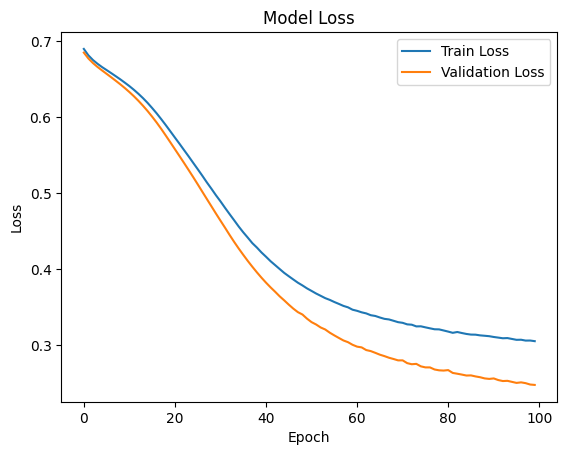

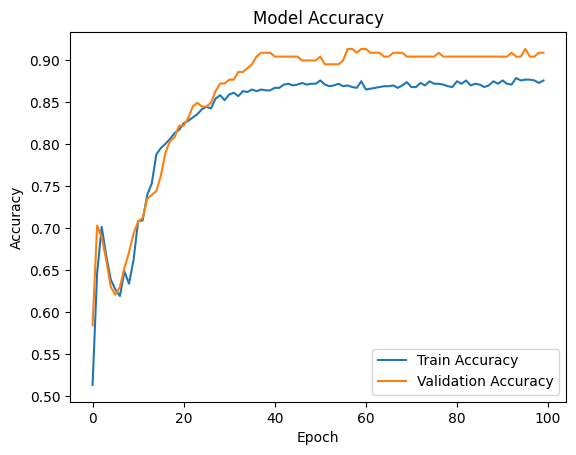

In [ ]:
# Visualisasi Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualisasi Akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model 2: Overfitting Model

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.6890 - accuracy: 0.5294 - val_loss: 0.6819 - val_accuracy: 0.5388
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6784 - accuracy: 0.5215 - val_loss: 0.6723 - val_accuracy: 0.5251
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6703 - accuracy: 0.5313 - val_loss: 0.6642 - val_accuracy: 0.5342
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.5274 - val_loss: 0.6567 - val_accuracy: 0.5616
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6562 - accuracy: 0.5421 - val_loss: 0.6491 - val_accuracy: 0.5890
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6491 - accuracy: 0.5969 - val_loss: 0.6415 - val_accuracy: 0.6073
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6421 - accuracy: 0.6614 - val_loss: 0.6340 - val_accuracy: 0.6393
Epoch 8/100
3

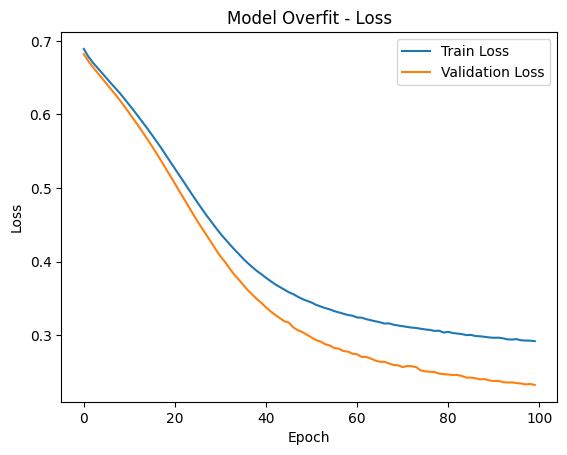

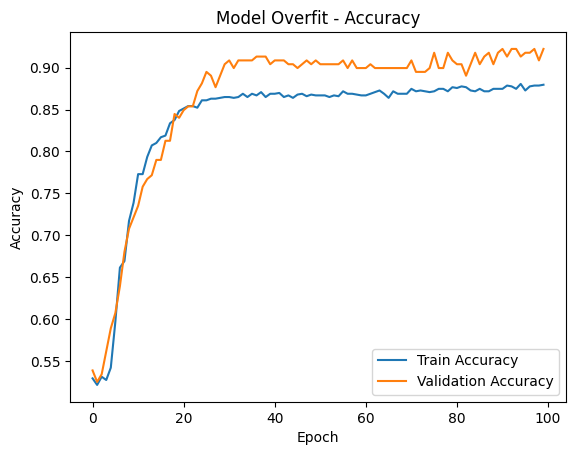

In [ ]:
# Model 2: Neural Network yang Overfit
model_overfit = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_overfit.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Latih Model Overfit
history_overfit = model_overfit.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=100)

# Visualisasi Loss Model Overfit
plt.plot(history_overfit.history['loss'], label='Train Loss')
plt.plot(history_overfit.history['val_loss'], label='Validation Loss')
plt.title('Model Overfit - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualisasi Akurasi Model Overfit
plt.plot(history_overfit.history['accuracy'], label='Train Accuracy')
plt.plot(history_overfit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Overfit - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Model 3: Regularized Model dengan L2 dan Dropout

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.8287 - accuracy: 0.5382 - val_loss: 0.8199 - val_accuracy: 0.5114
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8257 - accuracy: 0.5577 - val_loss: 0.8155 - val_accuracy: 0.5205
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8210 - accuracy: 0.5773 - val_loss: 0.8112 - val_accuracy: 0.5388
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8201 - accuracy: 0.5577 - val_loss: 0.8072 - val_accuracy: 0.5982
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8150 - accuracy: 0.5988 - val_loss: 0.8032 - val_accuracy: 0.6667
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8183 - accuracy: 0.5783 - val_loss: 0.7992 - val_accuracy: 0.6758
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8077 - accuracy: 0.6086 - val_loss: 0.7951 - val_accuracy: 0.7032
Epoch 8/100
3

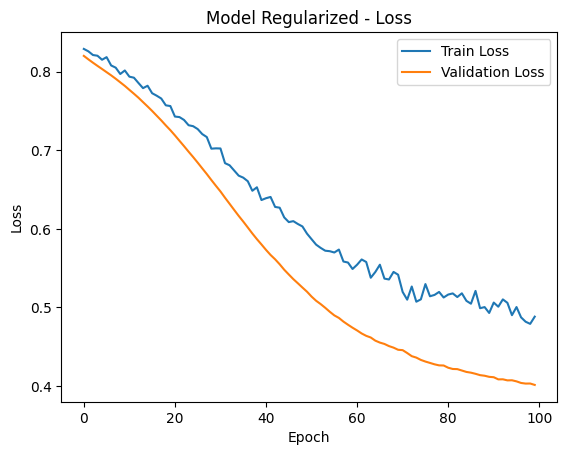

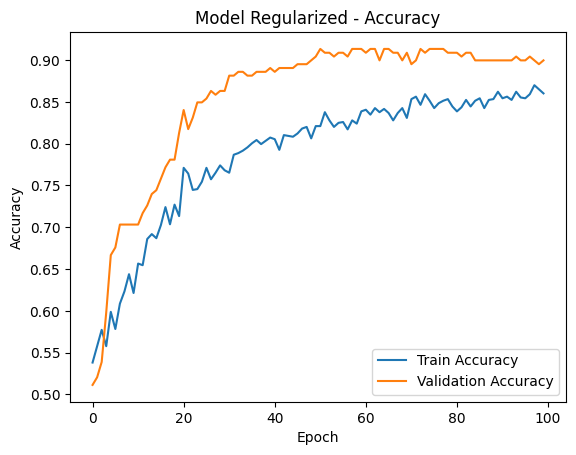

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Model 3: Neural Network dengan Regularisasi L2 dan Dropout
model_regularized = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_regularized.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Latih Model Regularized
history_regularized = model_regularized.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=100)

# Visualisasi Loss Model Regularized
plt.plot(history_regularized.history['loss'], label='Train Loss')
plt.plot(history_regularized.history['val_loss'], label='Validation Loss')
plt.title('Model Regularized - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualisasi Akurasi Model Regularized
plt.plot(history_regularized.history['accuracy'], label='Train Accuracy')
plt.plot(history_regularized.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Regularized - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
